# Predictive Analytics - Predicting Responses to Marketing Campaigns

**In the ever-evolving world of business, the focus has shifted from blind growth to profitable, customer-centric strategies.** This shift necessitates a deeper understanding of customer behavior, particularly the ability to **predict purchase intention** in e-commerce settings.
__This project unlocks the secrets to predicting purchase intentions:__ a critical skill for e-commerce success. 
Thiprojectde wildemostrateth the skills t
o:    - **

Clean and explore **data using heatmaps and correlation analy
    - **is.
Predict shopper purchase i**ntent using classification m.
    - **els.
Evathee your model's perfo**rmance with metrics like the confusion matrix, recall, precision, and F1-
    - **core.
Predict individual user r**esponse to marketing cam
    - **aigns.
Otheize yo**ur model by selecting the most relevant predictive 
  

By the end of this journey, you'll be well-equipped to leverage data-driven insights and **improve the effectiveness of e-commerce marketing efforts**.
factors.

In [230]:
# Import Python libraries
import pandas as pd
import re
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report

In [202]:
sns.set(style="darkgrid")  # You can choose other styles like "darkgrid", "white", etc.

# Create a color palette for the lines
colors = sns.color_palette("bright")

# Load the dataset

In [179]:
# Load the dataset
data_path = "https://raw.githubusercontent.com/donadviser/datasets/master/data-don/online_shoppers_intention.csv"
data = pd.read_csv(data_path)

# Exploring the dataset

In [180]:
def plot_data(df, plot_type, column1, column2=None, color=None, hue_color=None):
  """
  Creates a plot based on the specified plot type, columns, and color.
  Args:
      df: The DataFrame to plot.
      plot_type: The type of plot to create ("countplot", "histogram", or "scatter").
      column1: The first column to use for the plot.
      column2: The second column to use for the plot (optional, required for "scatter").
      color: The color to use for bars or data points (optional).
  """
  plt.figure(figsize=[12, 6])
  if plot_type == "countplot":
    sns.countplot(x=column1, data=df, hue="Revenue", palette=colors, legend=True)
  elif plot_type == "barplot":
    sns.barplot(x=column1, y=df[column2], data=df)  # Example for barplot
  elif plot_type == "histogram":
    sns.histplot(x=column1, data=df, kde=True, bins=5)  # Includes kernel density estimation
  elif plot_type == "scatter":
    if column2 is None:
      raise ValueError("Scatter plot requires two columns")
    sns.scatterplot(x=column1, y=column2, hue="Revenue", data=df)  # Optional hue argument for coloring by another variable
  else:
    raise ValueError(f"Unsupported plot type: {plot_type}")
  plt.show()


def plot_heatmap_for_numericals(df):
  """
  Creates a heatmap for the numerical features of a DataFrame.
  Args:
      df: The DataFrame to create the heatmap for.
  """
  plt.figure(figsize=[12, 6])
  # Filter numerical columns
  numerical_cols = df.select_dtypes(include=[np.number])
  # Create heatmap with chain method
  df.filter(items=numerical_cols.columns.tolist()) \
    .corr() \
    .pipe(sns.heatmap, cmap="coolwarm", annot=True)  # Use your preferred colormap
  plt.title("Correlation Heatmap")
  plt.show()

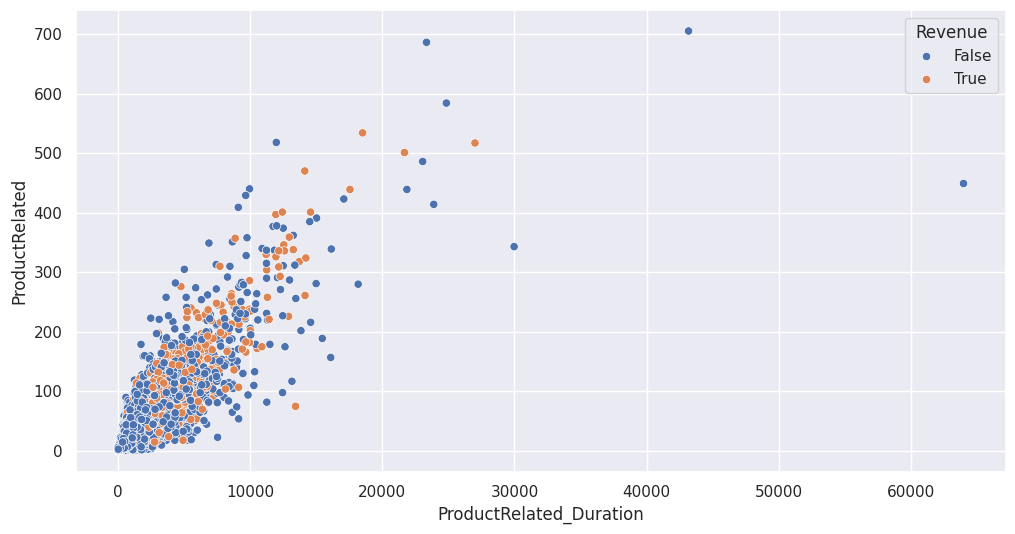

In [181]:
# Data Analysis and Preprocessing

(data
    # .head(10)  # View the first 10 rows
    # .shape  # Get the dimensions of the DataFrame
    # .info()  # Get data types, memory usage, and non-null values
    # .describe(include='all').T  # Summary statistics for all columns, transposed
    # .columns  # List column names
    # .value_counts(dropna=False)  # Count unique values in each column, including NaN
    # .nunique()  # Count unique values in each column (excluding NaN)
    # .isnull().sum()  # Check for missing values in each column
    # .duplicated().sum()  # Check for duplicate rows
    # .hist()  # Plot histograms of numerical columns
    #.corr()  # Calculate the correlation matrix between numerical columns
    # .sort_values(by='Region')  # Sort by a specific column
    # .groupby('Revenue').agg("sum")  # Group data and apply aggregate function
    # .sample(5, random_state=42)  # Get a random sample of 5 rows
    # .groupby('speaker_id').agg(mean_pitch=pd.NamedAgg(column='pitch', aggfunc='mean'))  # Custom aggregation
    # .pivot_table(values='duration', index='speaker_id', columns='emotion', aggfunc='mean')  # Pivot table
    # .resample('1S').mean().rolling(window=10).mean()  # Time series analysis (if applicable)
    # .apply(pd.to_numeric, errors='coerce')  # Attempt numeric conversion for potential mixed-type columns
    # .select_dtypes(include=['object']).head()  # Explore categorical columns
    # .plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))  # Boxplots for visual analysis
    # .corrwith(data['Revenue'])  # Explore correlations with a target column
    # .Revenue.value_counts() # Counts the unique values of the target column
    # .groupby("Browser").size().to_frame(name="count").reset_index() 
    # .pipe(plot_data, "countplot", "VisitorType")  # Call with plot type and column
    # .pipe(plot_heatmap_for_numericals)  # Apply heatmap function
    .pipe(plot_data, "scatter", "ProductRelated_Duration", "ProductRelated", "blue")
)

**Observations:**
* The `shape` of the dataset is `(12330, 18)`
* There are `125` duplicate rows
* There are no `null` values
* Data set is very imbalanced: `False = `10422`; `True` = `1908`

# Data Cleaning and Preprocessing using Pandas Chain Method
Exploratory Data Analysis (EDA) is one of the crucial steps in data science that allows us to achieve certain insights 
and statistical measures that are essential for prediction. Since we have so much to discuss, we will keep this section short! 
but always make it a habit to spend some time analysing and cleaning the dataset before training the data.

In [7]:
def rename_to_snake_case(df):
 """
 Renames the columns of a DataFrame to snake_case, handling camel case, acronyms, Pascal case, hyphens, and multiple spaces.
 Args:
     df: The DataFrame to rename.
 Returns:
     A new DataFrame with the columns renamed to snake_case.
 """
 return df.rename(columns=lambda s: '_'.join([word.lower() for word in re.findall(r'[A-Z][a-z]*', s.replace('-', '_').replace('  ', '_'))]))

In [40]:
# method from code used for titanic dataset. Some methods here are not relevant to the current dataset
df = (data
    # Rename the column to snake-case style
    .pipe(rename_to_snake_case)
    # Drop duplicates
    .drop_duplicates()
    ## Drop unnecessary columns
    # .drop([], axis=1)
    ## Fill missing values with the median age, mode, and mean respectively
    #.assign(age=lambda x: x['age'].fillna(x['age'].median()),
    #       embarked=lambda x: x['embarked'].fillna(x['embarked'].mode()[0]),
    #        fare=lambda x: x['fare'].fillna(x['fare'].mean())
    #        )
    # Create a new column 'family_size' by adding the 'sibsp' and 'parch' columns
    #.assign(family_size=lambda x: x['sibsp'] + x['parch'])
    # Create a new column 'is_alone' to indicate whether the passenger is alone or not
    #.assign(is_alone=lambda x: x['family_size'].apply(lambda x: 1 if x == 0 else 0))
    # Convert categorical variables into dummy variables or into numerical, use .assign below
    #.pipe(pd.get_dummies, columns=['pclass', 'sex', 'embarked'])
    #.assign(sex=lambda x: x['sex'].map({'male': 0, 'female': 1}),
    #        embarked=lambda x: x['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    #        )
    # Drop redundant columns and columns with missing values
    #.drop(['sibsp', 'parch', 'family_size'], axis=1)
    #.dropna()
    # set the 'Survived' column as the target variable
    #.rename(columns={'survived': 'target'})
    # Remove outliers in 'age' and 'fare' simultaneously
    #.pipe(handle_outliers, ['age', 'fare'])
    #.reset_index(drop=True)
    #.info()
    #.describe()
    #. head(10)
) # Before drop duplicates, shape = (12330, 18)

df.shape

(12205, 18)

In [212]:
df.weekend.unique()

array([False,  True])

## Stratified Split-Train-Test
The target "revenue" is **very imbalanced**. This technique ensures that the training and testing sets have a similar **class distribution** as the original dataset. This is crucial when dealing with imbalanced datasets (where one class has significantly fewer samples) to prevent the model from being biased towards the majority class.

Splitting the test and train 30% and 70%

In [206]:
# dataset with features (X) and target variable (y)
X = df.drop("revenue", axis=1)                                               
y = df["revenue"]

# Define the split ratio
test_size = 0.3  # 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8543, 17), (3662, 17), (8543,), (3662,))

In [194]:
categorical_features = ["operating_systems", "browser", "region", "traffic_type", "visitor_type", "weekend", "month"]

In [200]:
numerical_features = df.drop("revenue", axis=1).columns.difference(categorical_features)

In [210]:
transformer = ColumnTransformer(transformers=[
   ("ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)])

In [211]:
transformed_X_train = pd.DataFrame(transformer.fit_transform(X_train), 
                                   columns=transformer.get_feature_names_out(), 
                                   index=X_train.index)

transformed_X_train.head(10)

/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/valida

,ohe__operating_systems_1,ohe__operating_systems_2,ohe__operating_systems_3,ohe__operating_systems_4,ohe__operating_systems_5,ohe__operating_systems_6,ohe__operating_systems_7,ohe__operating_systems_8,ohe__browser_1,ohe__browser_2,...,ohe__month_Aug,ohe__month_Dec,ohe__month_Feb,ohe__month_Jul,ohe__month_June,ohe__month_Mar,ohe__month_May,ohe__month_Nov,ohe__month_Oct,ohe__month_Sep
3293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6279,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4805,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [214]:
# Custom transformer to convert bool columns to int
class BoolToIntTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].astype(int)
        return X_copy

In [237]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Custom transformer for converting bool to int
bool_transformer = Pipeline(steps=[
    ('bool_to_int', BoolToIntTransformer(column='weekend'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', bool_transformer, ['weekend'])
    ])

# Label encoding for the target variable 'revenue'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))  # Replace YourClassifierHere with the actual classifier you want to use
])

In [238]:
pipeline.fit(X_train, y_train)

/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/uti

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['administrative', 'administrative_duration', 'bounce_rates',
       'exit_rates', 'informational', 'informational_duration', 'page_values',
       'product_related', 'product_related_duration', 'special_day'],
      dtype='objec...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['operating_systems',
                                                   'browser', 'region',
                                                   'traffic_type',
                                                   'visitor_type', 'weekend',
                                                   'month']),
                                                 ('bool',
                                                  Pipeline(steps=[('bool_to_int',
                                                                   BoolToIntTransformer(column='weekend'))]),
                                                  ['weekend'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [239]:
print("Training Score:", pipeline.score(X_train, y_train))

Training Score: 0.8822427718600023


/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/uti

In [240]:
pred_prob = pipeline.predict_proba(X_test)

pred_prob

/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/uti

array([[0.82368426, 0.17631574],
       [0.52157266, 0.47842734],
       [0.84885463, 0.15114537],
       ...,
       [0.95225849, 0.04774151],
       [0.9595089 , 0.0404911 ],
       [0.94398009, 0.05601991]])

In [241]:
y_pred = pipeline.predict(X_test)

predict_vs_actual_df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})

predict_vs_actual_df.sample(10)

/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/don/.pyenv/versions/3.10.13/envs/venv310_learn/lib/python3.10/site-packages/sklearn/uti

,Predicted,Actual
3021,0,0
2102,0,0
1383,0,0
424,0,1
819,0,0
102,1,1
94,0,0
3283,1,1
1793,0,0
2169,0,0


In [242]:
confusion_matrix_clf = pd.crosstab(predict_vs_actual_df["Predicted"], predict_vs_actual_df["Actual"])

confusion_matrix_clf

Actual,0,1
Predicted,,
0,3014,334
1,76,238


In [243]:
f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score: ", f1score)
print("Accuracy Score: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score: ", recall)

F1 Score:  0.5372460496613997
Accuracy Score:  0.8880393227744402
Precision Score:  0.7579617834394905
Recall Score:  0.4160839160839161


In [244]:
true_pos = confusion_matrix_clf[1][1]
true_neg = confusion_matrix_clf[0][0]
false_pos = confusion_matrix_clf[0][1]
false_neg = confusion_matrix_clf[1][0]

print("true Positive: ", true_pos)
print("true Negative: ", true_neg)
print("False Positive: ", false_pos)
print("False Negative: ", false_neg)

true Positive:  238
true Negative:  3014
False Positive:  76
False Negative:  334


In [245]:
manual_accuracy = (true_pos + true_neg) / (true_pos + false_pos + true_neg + false_neg)

print("Accuracy Score (Manually): ", manual_accuracy)

Accuracy Score (Manually):  0.8880393227744402


In [246]:
manual_precision = (true_pos) / (true_pos + false_pos)

print("Precision Score (Manually): ", manual_precision)

Precision Score (Manually):  0.7579617834394905


In [247]:
manual_recall = true_pos / (true_pos + false_neg)

print("Recall Score (Manually): ", manual_recall)

Recall Score (Manually):  0.4160839160839161


In [248]:
manual_f1score = (2 * manual_recall * manual_precision) / (manual_recall + manual_precision)

print("F1 Score (Manually): ", manual_f1score)

F1 Score (Manually):  0.5372460496613997
